In [38]:
# Import scraping modules
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [39]:
# Import data manipulation modules
import pandas as pd
import numpy as np
# Import data visualization modules
import matplotlib as mpl
import matplotlib.pyplot as plt

In [101]:
# URL of page
url = 'https://www.pro-football-reference.com/years/2021/passing.htm'
# Open URL and pass to BeautifulSoup
html = urlopen(url)
stats_page = BeautifulSoup(html)

In [102]:
# Collect table headers
column_headers = stats_page.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]

In [103]:
print(column_headers)

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC', 'GWD']


In [104]:
# Collect table rows
rows = stats_page.findAll('tr')[1:]
# Get stats from each row
qb_stats = []
for i in range(len(rows)):
  qb_stats.append([col.getText() for col in rows[i].findAll('td')])

In [105]:
print(qb_stats[0])

['Derek Carr', 'LVR', '30', 'qb', '2', '2', '2-0-0', '62', '93', '66.7', '817', '4', '4.3', '1', '1.1', '34', '61', '8.8', '9.2', '13.2', '408.5', '104.1', '61.5', '5', '35', '7.98', '8.34', '5.1', '1', '1']


In [106]:
# Create DataFrame from our scraped data
data = pd.DataFrame(qb_stats, columns=column_headers[1:])

In [107]:
# Examine first five rows of data
data.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD
0,Derek Carr,LVR,30,qb,2,2,2-0-0,62,93,66.7,817,4,4.3,1,1.1,34,61,8.8,9.2,13.2,408.5,104.1,61.5,5,35,7.98,8.34,5.1,1,1
1,Kyler Murray,ARI,24,qb,2,2,2-0-0,50,68,73.5,689,7,10.3,3,4.4,18,77,10.1,10.2,13.8,344.5,121.5,71.6,5,38,8.92,8.99,6.8,1,1
2,Patrick Mahomes,KAN,26,qb,2,2,1-1-0,51,67,76.1,680,6,9.0,1,1.5,35,75,10.1,11.3,13.3,340.0,131.4,79.4,2,13,9.67,10.75,2.9,1,1
3,Justin Herbert,LAC,23,qb,2,2,1-1-0,62,88,70.5,675,2,2.3,3,3.4,33,42,7.7,6.6,10.9,337.5,86.1,43.4,4,28,7.03,6.00,4.3,1,1
4,Tom Brady,TAM,44,qb,2,2,2-0-0,56,86,65.1,655,9,10.5,2,2.3,36,47,7.6,8.7,11.7,327.5,113.3,65.0,3,17,7.17,8.18,3.4,1,1


In [108]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [109]:
# Rename sack yards column to `Yds_Sack`
new_columns = data.columns.values
new_columns[-6] = 'Yds_Sack'
data.columns = new_columns

In [110]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_Sack', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [111]:
# Select stat categories
categories = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate']

In [112]:
# Create data subset for radar chart
data_radar = data[['Player', 'Tm'] + categories]
data_radar.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Derek Carr,LVR,66.7,817,4,1,8.8,104.1
1,Kyler Murray,ARI,73.5,689,7,3,10.1,121.5
2,Patrick Mahomes,KAN,76.1,680,6,1,10.1,131.4
3,Justin Herbert,LAC,70.5,675,2,3,7.7,86.1
4,Tom Brady,TAM,65.1,655,9,2,7.6,113.3


In [113]:
# Check data types
data_radar.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

In [114]:
# Convert data to numerical values
for i in categories:
  data_radar[i] = pd.to_numeric(data[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
# Check data types
data_radar.dtypes

Player     object
Tm         object
Cmp%      float64
Yds       float64
TD        float64
Int       float64
Y/A       float64
Rate      float64
dtype: object

In [116]:
print(data_radar)

                Player    Tm   Cmp%    Yds   TD  Int   Y/A   Rate
0           Derek Carr   LVR   66.7  817.0  4.0  1.0   8.8  104.1
1         Kyler Murray   ARI   73.5  689.0  7.0  3.0  10.1  121.5
2      Patrick Mahomes   KAN   76.1  680.0  6.0  1.0  10.1  131.4
3       Justin Herbert   LAC   70.5  675.0  2.0  3.0   7.7   86.1
4            Tom Brady   TAM   65.1  655.0  9.0  2.0   7.6  113.3
5         Dak Prescott   DAL   76.5  640.0  3.0  2.0   7.5   99.1
6     Matthew Stafford   LAR   69.6  599.0  5.0  1.0  10.7  127.0
7       Russell Wilson   SEA   74.1  597.0  6.0  0.0  11.1  146.9
8         Kirk Cousins   MIN   71.6  595.0  5.0  0.0   7.3  112.9
9    Teddy Bridgewater   DEN   77.1  592.0  4.0  0.0   8.5  120.7
10         Sam Darnold   CAR   68.5  584.0  3.0  1.0   8.0  100.5
11          Jared Goff   DET   68.8  584.0  5.0  2.0   6.3   94.6
12      Ryan Tannehill   TEN   64.0  559.0  1.0  1.0   7.5   85.4
13      Baker Mayfield   CLE   81.6  534.0  1.0  2.0  10.9  101.9
14        

In [117]:
# Remove ornamental characters for achievements
data_radar['Player'] = data_radar['Player'].str.replace('*', '')
data_radar['Player'] = data_radar['Player'].str.replace('+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
data_radar.dropna()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Derek Carr,LVR,66.7,817.0,4.0,1.0,8.8,104.1
1,Kyler Murray,ARI,73.5,689.0,7.0,3.0,10.1,121.5
2,Patrick Mahomes,KAN,76.1,680.0,6.0,1.0,10.1,131.4
3,Justin Herbert,LAC,70.5,675.0,2.0,3.0,7.7,86.1
4,Tom Brady,TAM,65.1,655.0,9.0,2.0,7.6,113.3
5,Dak Prescott,DAL,76.5,640.0,3.0,2.0,7.5,99.1
6,Matthew Stafford,LAR,69.6,599.0,5.0,1.0,10.7,127.0
7,Russell Wilson,SEA,74.1,597.0,6.0,0.0,11.1,146.9
8,Kirk Cousins,MIN,71.6,595.0,5.0,0.0,7.3,112.9
9,Teddy Bridgewater,DEN,77.1,592.0,4.0,0.0,8.5,120.7


In [119]:
# Filter by passing yards
data_radar_filtered = data_radar[data_radar['Yds'] > 100]

In [120]:
# Create columns with percentile rank
for i in categories:
  data_radar_filtered[i + '_Rank'] = data_radar_filtered[i].rank(pct=True)
# We need to flip the rank for interceptions
data_radar_filtered['Int_Rank'] = 1 - data_radar_filtered['Int_Rank']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [121]:
# Examine data
data_radar_filtered.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate,Cmp%_Rank,Yds_Rank,TD_Rank,Int_Rank,Y/A_Rank,Rate_Rank
0,Derek Carr,LVR,66.7,817.0,4.0,1.0,8.8,104.1,0.411765,1.000000,0.705882,0.558824,0.794118,0.676471
1,Kyler Murray,ARI,73.5,689.0,7.0,3.0,10.1,121.5,0.779412,0.970588,0.970588,0.102941,0.897059,0.882353
2,Patrick Mahomes,KAN,76.1,680.0,6.0,1.0,10.1,131.4,0.911765,0.941176,0.926471,0.558824,0.897059,0.970588
3,Justin Herbert,LAC,70.5,675.0,2.0,3.0,7.7,86.1,0.661765,0.911765,0.323529,0.102941,0.617647,0.323529
4,Tom Brady,TAM,65.1,655.0,9.0,2.0,7.6,113.3,0.323529,0.882353,1.000000,0.264706,0.588235,0.823529


In [122]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15

In [141]:
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d', 'CAR':'#0085ca', 'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00', 'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731', 'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837', 'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683', 'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740', 'LVR':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000', 'SEA':'#002244', 'TAM':'#d50a0a', 'TEN':'#0c2340', 'WAS':'#773141'}

In [142]:
# Calculate angles for radar chart
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories) + 1) + offset

In [143]:
# Plot data and fill with team color
ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)

NameError: ignored

In [144]:
# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

NameError: ignored

In [145]:
# Add player name
ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)

NameError: ignored

In [93]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [146]:
# Function to get QB data
def get_qb_data(data, team):
  return np.asarray(data[data['Tm'] == team])[0]

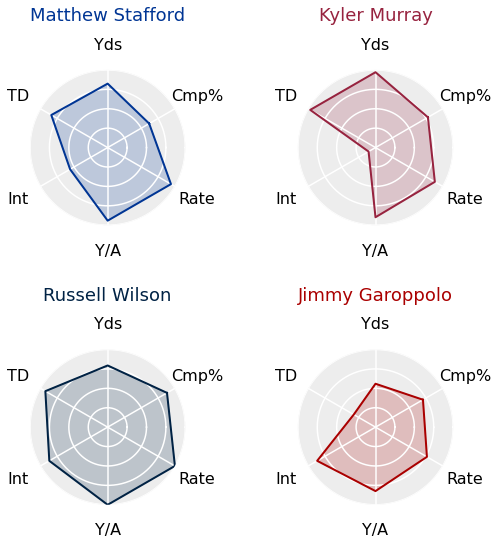

In [147]:
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')
# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')
# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)
# Get QB data
sf_data = get_qb_data(data_radar_filtered, 'SFO')
sea_data = get_qb_data(data_radar_filtered, 'SEA')
ari_data = get_qb_data(data_radar_filtered, 'ARI')
lar_data = get_qb_data(data_radar_filtered, 'LAR')
# Plot QB data
ax1 = create_radar_chart(ax1, angles, lar_data, team_colors['LAR'])
ax2 = create_radar_chart(ax2, angles, ari_data, team_colors['ARI'])
ax3 = create_radar_chart(ax3, angles, sea_data, team_colors['SEA'])
ax4 = create_radar_chart(ax4, angles, sf_data, team_colors['SFO'])
plt.show()

In [148]:
# Function to get QB data
def get_qb_data(data, team):
    return np.asarray(data[data['Tm'] == team])[0]

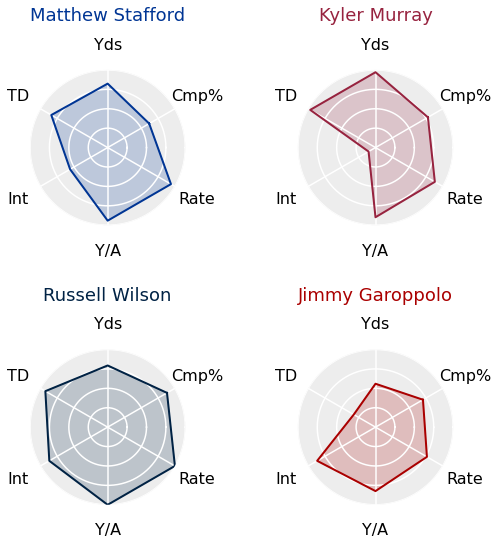

In [149]:
# NFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
sf_data = get_qb_data(data_radar_filtered, 'SFO')
sea_data = get_qb_data(data_radar_filtered, 'SEA')
ari_data = get_qb_data(data_radar_filtered, 'ARI')
lar_data = get_qb_data(data_radar_filtered, 'LAR')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, lar_data, team_colors['LAR'])
ax2 = create_radar_chart(ax2, angles, ari_data, team_colors['ARI'])
ax3 = create_radar_chart(ax3, angles, sea_data, team_colors['SEA'])
ax4 = create_radar_chart(ax4, angles, sf_data, team_colors['SFO'])

plt.show()

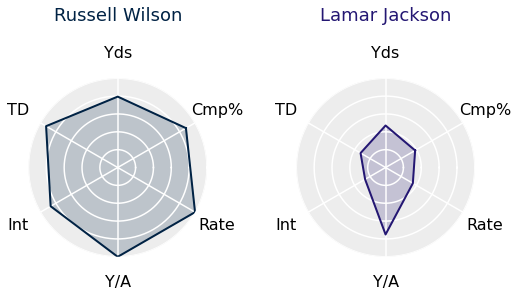

In [150]:
# MVP Race
# Create figure
fig = plt.figure(figsize=(8, 4), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(121, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(122, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
bal_data = get_qb_data(data_radar_filtered, 'BAL')
sea_data = get_qb_data(data_radar_filtered, 'SEA')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, sea_data, team_colors['SEA'])
ax2 = create_radar_chart(ax2, angles, bal_data, team_colors['BAL'])

plt.show()

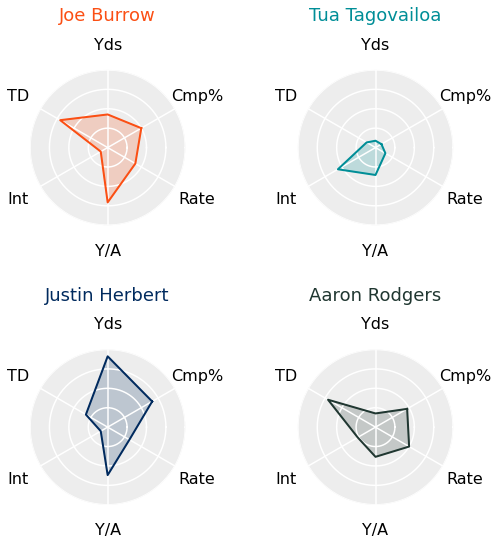

In [151]:
# 1st Round Draft Picks
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
cin_data = get_qb_data(data_radar_filtered, 'CIN')
mia_data = get_qb_data(data_radar_filtered, 'MIA')
lac_data = get_qb_data(data_radar_filtered, 'LAC')
gnb_data = get_qb_data(data_radar_filtered, 'GNB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, cin_data, team_colors['CIN'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, lac_data, team_colors['LAC'])
ax4 = create_radar_chart(ax4, angles, gnb_data, team_colors['GNB'])

plt.show()

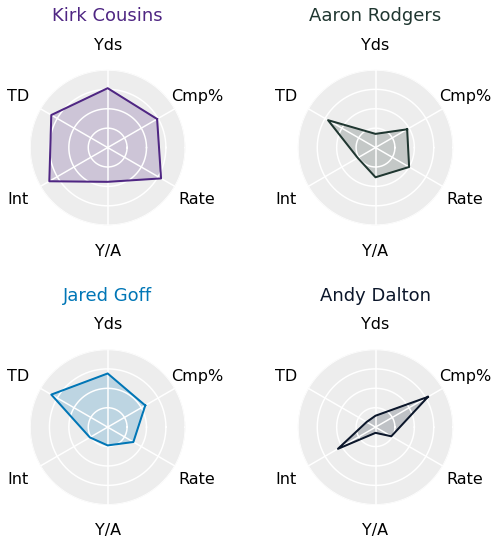

In [152]:
# NFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
min_data = get_qb_data(data_radar_filtered, 'MIN')
gnb_data = get_qb_data(data_radar_filtered, 'GNB')
det_data = get_qb_data(data_radar_filtered, 'DET')
chi_data = get_qb_data(data_radar_filtered, 'CHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, min_data, team_colors['MIN'])
ax2 = create_radar_chart(ax2, angles, gnb_data, team_colors['GNB'])
ax3 = create_radar_chart(ax3, angles, det_data, team_colors['DET'])
ax4 = create_radar_chart(ax4, angles, chi_data, team_colors['CHI'])

plt.show()

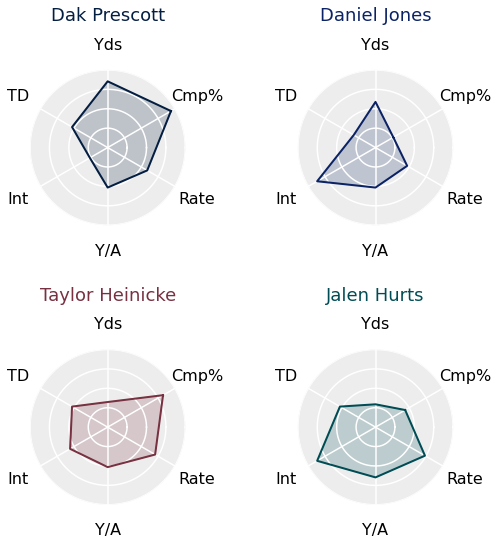

In [153]:
# NFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
dal_data = get_qb_data(data_radar_filtered, 'DAL')
nyg_data = get_qb_data(data_radar_filtered, 'NYG')
was_data = get_qb_data(data_radar_filtered, 'WAS')
phi_data = get_qb_data(data_radar_filtered, 'PHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, dal_data, team_colors['DAL'])
ax2 = create_radar_chart(ax2, angles, nyg_data, team_colors['NYG'])
ax3 = create_radar_chart(ax3, angles, was_data, team_colors['WAS'])
ax4 = create_radar_chart(ax4, angles, phi_data, team_colors['PHI'])

plt.show()

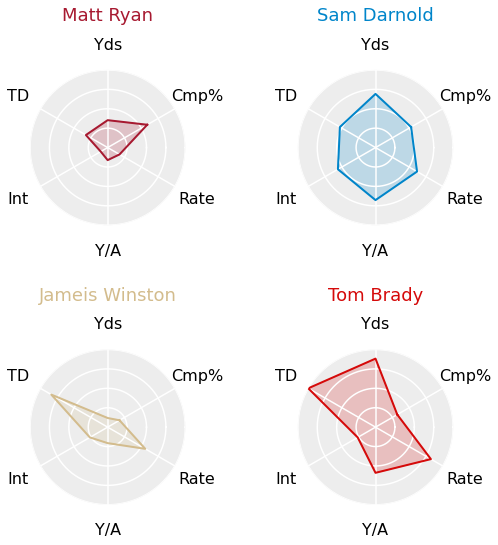

In [154]:
# NFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
atl_data = get_qb_data(data_radar_filtered, 'ATL')
car_data = get_qb_data(data_radar_filtered, 'CAR')
nor_data = get_qb_data(data_radar_filtered, 'NOR')
tam_data = get_qb_data(data_radar_filtered, 'TAM')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, atl_data, team_colors['ATL'])
ax2 = create_radar_chart(ax2, angles, car_data, team_colors['CAR'])
ax3 = create_radar_chart(ax3, angles, nor_data, team_colors['NOR'])
ax4 = create_radar_chart(ax4, angles, tam_data, team_colors['TAM'])

plt.show()


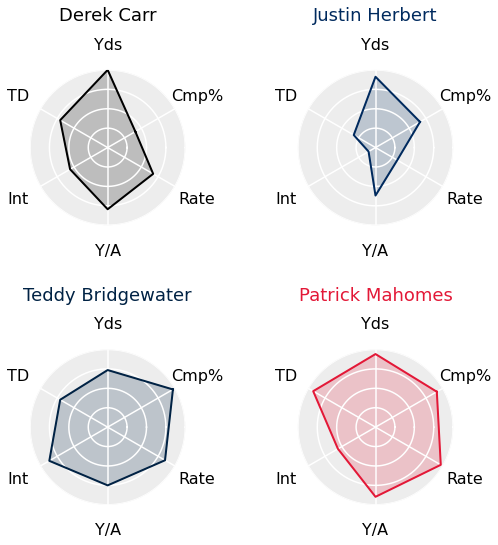

In [155]:
# AFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
oak_data = get_qb_data(data_radar_filtered, 'LVR')
lac_data = get_qb_data(data_radar_filtered, 'LAC')
den_data = get_qb_data(data_radar_filtered, 'DEN')
kan_data = get_qb_data(data_radar_filtered, 'KAN')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, oak_data, team_colors['LVR'])
ax2 = create_radar_chart(ax2, angles, lac_data, team_colors['LAC'])
ax3 = create_radar_chart(ax3, angles, den_data, team_colors['DEN'])
ax4 = create_radar_chart(ax4, angles, kan_data, team_colors['KAN'])

plt.show()

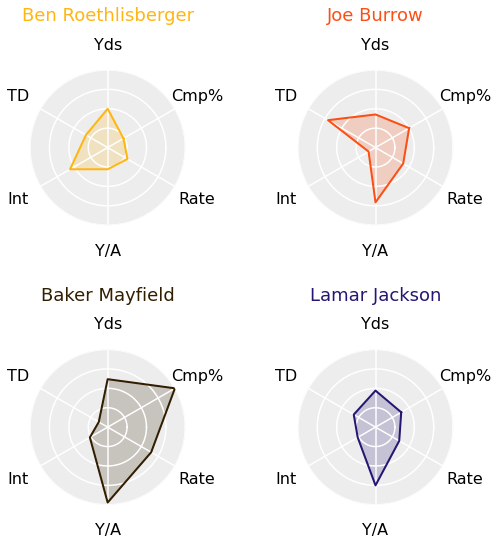

In [156]:
# AFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
pit_data = get_qb_data(data_radar_filtered, 'PIT')
cin_data = get_qb_data(data_radar_filtered, 'CIN')
cle_data = get_qb_data(data_radar_filtered, 'CLE')
bal_data = get_qb_data(data_radar_filtered, 'BAL')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, pit_data, team_colors['PIT'])
ax2 = create_radar_chart(ax2, angles, cin_data, team_colors['CIN'])
ax3 = create_radar_chart(ax3, angles, cle_data, team_colors['CLE'])
ax4 = create_radar_chart(ax4, angles, bal_data, team_colors['BAL'])

plt.show()


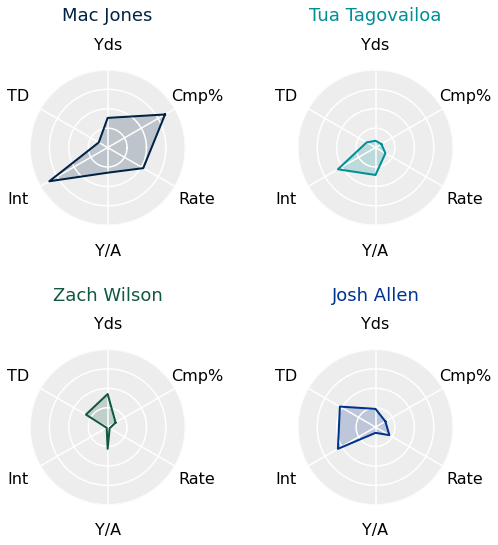

In [157]:
# AFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
nwe_data = get_qb_data(data_radar_filtered, 'NWE')
mia_data = get_qb_data(data_radar_filtered, 'MIA')
nyj_data = get_qb_data(data_radar_filtered, 'NYJ')
buf_data = get_qb_data(data_radar_filtered, 'BUF')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, nwe_data, team_colors['NWE'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, nyj_data, team_colors['NYJ'])
ax4 = create_radar_chart(ax4, angles, buf_data, team_colors['BUF'])

plt.show()

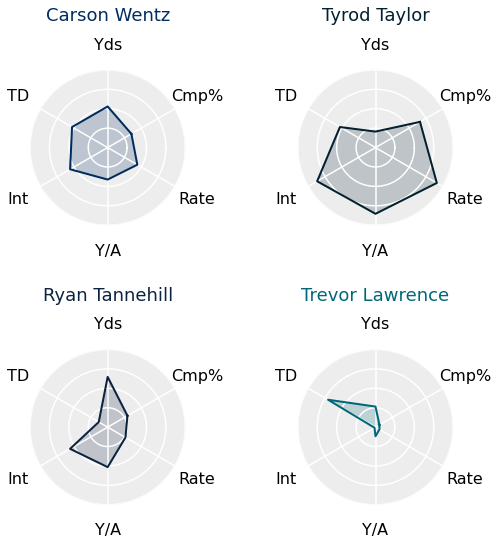

In [158]:
# AFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
ind_data = get_qb_data(data_radar_filtered, 'IND')
hou_data = get_qb_data(data_radar_filtered, 'HOU')
ten_data = get_qb_data(data_radar_filtered, 'TEN')
jax_data = get_qb_data(data_radar_filtered, 'JAX')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, ind_data, team_colors['IND'])
ax2 = create_radar_chart(ax2, angles, hou_data, team_colors['HOU'])
ax3 = create_radar_chart(ax3, angles, ten_data, team_colors['TEN'])
ax4 = create_radar_chart(ax4, angles, jax_data, team_colors['JAX'])

plt.show()
